# Drills - Similarity Models

## Drill: KNN regression
 


by: Melissa N 

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

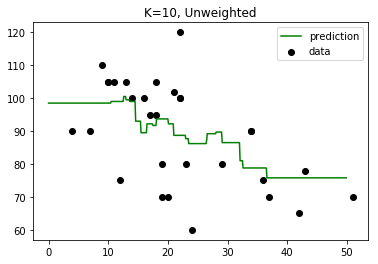

In [4]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

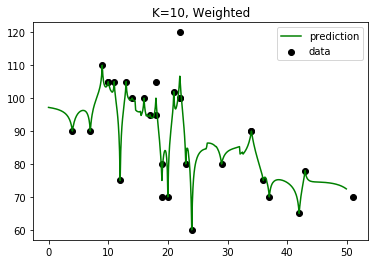

In [5]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


### Why don't you add the other feature and mess around with  k  and weighting to see if you can do any better than we've done so far?

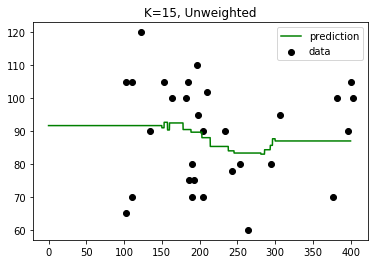

Unweighted Accuracy: -0.39 (+/- 0.64)


In [7]:
# Build our model.
knn1 = neighbors.KNeighborsRegressor(n_neighbors=15)
X1 = pd.DataFrame(music.duration)
Y1 = music.bpm
knn1.fit(X1, Y1)

# Set up our prediction line.
T_1 = np.arange(0, 400, 0.1)[:, np.newaxis]


# Trailing underscores are a common convention for a prediction.
Y1_ = knn1.predict(T_1)

plt.scatter(X1, Y1, c='k', label='data')
plt.plot(T_1, Y1_, c='g', label='prediction')
plt.legend()
plt.title('K=15, Unweighted')
plt.show()

score1 = cross_val_score(knn1, X1, Y1, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))


#### Using weights

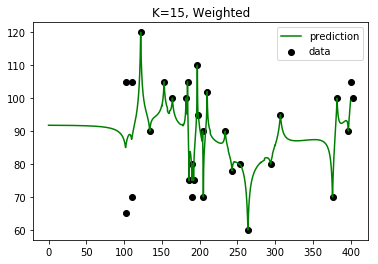

Weighted Accuracy: -0.75 (+/- 0.76)


In [13]:
# Run the same model, this time with weights.
knn_w1 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
X1 = pd.DataFrame(music.duration)
Y1 = music.bpm
knn_w1.fit(X1, Y1)

# Set up our prediction line.
T_1 = np.arange(0, 400, 0.1)[:, np.newaxis]

Y1_ = knn_w1.predict(T_1)

plt.scatter(X1, Y1, c='k', label='data')
plt.plot(T_1, Y1_, c='g', label='prediction')
plt.legend()
plt.title('K=15, Weighted')
plt.show()

score_w1 = cross_val_score(knn_w1, X1, Y1, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w1.mean(), score_w1.std() * 2))

#### Prediction Using Duration and Loudness

In [11]:
# Build our model.
knn2 = neighbors.KNeighborsRegressor(n_neighbors=15)
X2 = pd.DataFrame([music.duration, music.loudness])
X2 = X2.T
Y2 = music.bpm
knn2.fit(X2, Y2)

score2 = cross_val_score(knn2, X2, Y2, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))

Unweighted Accuracy: -0.38 (+/- 0.65)


In [12]:
# Run the same model, this time with weights.
knn_w1 = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
X1 = pd.DataFrame([music.duration, music.loudness])
X1 = X1.T
Y1 = music.bpm
knn_w1.fit(X1, Y1)

score_w1 = cross_val_score(knn_w1, X1, Y1, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w1.mean(), score_w1.std() * 2))

Weighted Accuracy: -0.23 (+/- 0.61)
